# Load Data dan Preprocessing

## Load Data


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout

In [5]:
url = "https://drive.google.com/uc?id=18IBXOeb0O7TxDQhk2JsexHrdL0bgNZTn"
df = pd.read_csv(url, delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Preprocessing

In [8]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [9]:
label_encoder = LabelEncoder()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [10]:
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,4,1,2,0,0.092259,1,0,2,0.133333,8,0.053070,0.000000,0.000000,0.000000,3,0
1,0.337662,9,2,1,0,0.073067,1,0,2,0.133333,8,0.030704,0.000000,0.000000,0.000000,3,0
2,0.194805,2,1,1,0,0.072822,1,1,2,0.133333,8,0.015453,0.000000,0.000000,0.000000,3,0
3,0.376623,1,1,3,0,0.086476,1,0,2,0.133333,8,0.018707,0.000000,0.000000,0.000000,3,0
4,0.194805,11,2,3,0,0.072812,0,0,2,0.133333,8,0.040260,0.000000,0.000000,0.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,9,1,2,0,0.080293,0,0,0,0.533333,9,0.198658,0.032258,0.000000,0.000000,3,1
45207,0.688312,5,0,0,0,0.088501,0,0,0,0.533333,9,0.092721,0.016129,0.000000,0.000000,3,1
45208,0.701299,5,1,1,0,0.124689,0,0,0,0.533333,9,0.229158,0.064516,0.212156,0.010909,2,1
45209,0.506494,1,1,1,0,0.078868,0,0,1,0.533333,9,0.103294,0.048387,0.000000,0.000000,3,0


In [11]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modeling

In [12]:
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8648 - loss: 0.3903 - val_accuracy: 0.8822 - val_loss: 0.3458
Epoch 2/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8783 - loss: 0.3490 - val_accuracy: 0.8822 - val_loss: 0.3376
Epoch 3/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8861 - loss: 0.3297 - val_accuracy: 0.8822 - val_loss: 0.3345
Epoch 4/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8843 - loss: 0.3276 - val_accuracy: 0.8822 - val_loss: 0.3321
Epoch 5/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8796 - loss: 0.3336 - val_accuracy: 0.8822 - val_loss: 0.3277
Epoch 6/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8829 - loss: 0.3268 - val_accuracy: 0.8823 - val_loss: 0.3263
Epoch 7/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8851 - loss: 0.3192 - val_accuracy: 0.8824 - val_loss: 0.3229
Epoch 8/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8854 - loss: 0.3189 - val_accuracy: 0.

# Evaluasi

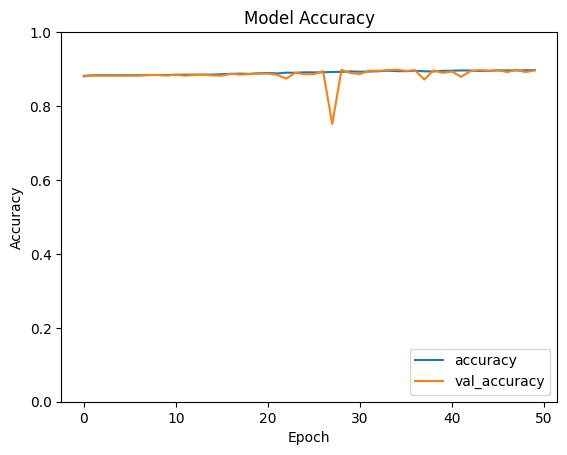

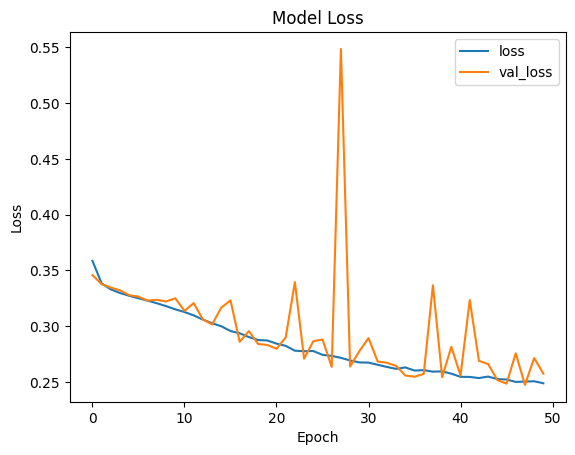

In [15]:
# Plot Akurasi
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

#Plot Loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [16]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.99      0.94     11966
           1       0.68      0.23      0.34      1598

    accuracy                           0.90     13564
   macro avg       0.79      0.61      0.64     13564
weighted avg       0.88      0.90      0.87     13564



In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8919 - loss: 0.2635
Test accuracy: 0.8963432908058167
